### LDA (repeat)
```
Filename: LDA_v5
Description: Use LDA to reduce features
Input: Reduced Feature file, hand picked to avoid singularity error
Output: Reduced Feature File
Runtime: 2 mins
Version:
    v5: 10-Jul-2018: Initial Version
```

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import datetime

In [2]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-14 06:32:49


In [3]:
# Parameters section
n_feat = 20
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3" # Train 
# Note: Do not generate test file using LDA; it will give you different features
#       use ReduceCSVColumnsUsingSampleFile_v1.ipynb
# fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract10Test_v3" # Test

In [4]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [5]:
df.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576',
       'label'],
      dtype='object', length=578)

In [6]:
x_data = df.drop('label',axis=1)
y_data = df['label'].values

In [7]:
x_data

f0          f1         f2         f3         f4         f5  \
0      -179.666051   97.898820  87.257160  40.244950  25.241411  13.050284   
1      -191.469491   95.082994  85.964605  42.555401  27.873655   9.443263   
2      -205.243335   76.532599  78.134337  47.496838  31.985075   8.003771   
3      -163.546226   79.533147  66.284234  39.749165  27.348218   8.756943   
4      -127.627386   71.763226  63.799587  39.157084  25.120119  -3.173453   
5      -127.241833   60.684923  63.808425  51.919367  29.141135 -14.332897   
6      -130.011211   55.645161  65.006166  57.063519  32.507488 -18.957311   
7      -135.645480   50.642628  71.819739  59.354083  29.656495 -20.378036   
8      -132.763356   50.813330  71.550507  58.739950  26.564626 -18.439848   
9      -124.114355   58.231277  70.668323  56.778097  24.305630 -15.281695   
10     -126.716366   56.039429  66.888094  60.939259  29.592052 -20.162421   
11     -135.465443   45.765122  64.658847  68.474837  25.432959 -26.587661   
12     -150.295613   36.777912  69.420766  75.751175  29.247142 -29.557340   
13     -196.646775   44.749225  74.693860  75.486767  35.069073 -27.232820   
14     -266.936556   71.703420  58.979100  57.293145  26.966968 -13.690878   
15     -267.239118   60.619677  30.157737  63.751175   8.681804  -9.724777   
16     -261.796257   70.096239  30.835016  56.737726   2.944035 -10.403419   
17     -170.216736   44.074627  20.860543  51.131885  39.600908 -17.263902   
18     -112.092050   23.467592  25.905277  58.141815  48.733273  -9.731639   
19     -135.313852   16.738864  43.760755  62.306509  45.552337  -4.539041   
20     -169.607151   33.413924  62.527145  68.066901  39.280437  -6.494494   
21     -206.545766   51.849434  66.010073  75.212858  37.554098 -12.213399   
22     -225.537090   52.645875  57.152513  76.745801  38.008315 -13.130600   
23     -218.632035   38.802749  59.031254  86.454190  37.118080 -11.808288   
24     -213.253634   32.898472  56.303609  81.631129  28.278041 -18.262892   
25     -202.992829   40.958388  53.941316  71.485481  21.208181 -12.957147   
26     -193.781014   48.273961  61.481239  69.179057  23.958149 -13.014053   
27     -163.936403   61.541492  66.687015  66.113145  26.430395  -2.743768   
28     -149.622970   66.547595  63.764601  60.838525  27.601549  -1.542242   
29     -159.549895   67.931495  60.731262  56.260080  35.434233  -0.342614   
...            ...         ...        ...        ...        ...        ...   
206635  -48.311687  117.256787 -19.845544  34.290444  -6.851639   4.066277   
206636  -56.960968  119.023702 -18.907883  33.903575  -7.929239   5.613477   
206637  -61.119347  117.853912 -18.495492  33.773050  -8.501410   7.124133   
206638  -68.021100  117.608172 -12.837727  38.771230  -4.636289   7.011319   
206639  -68.080872  122.805356 -13.494246  40.790951  -0.196222   6.721985   
206640  -64.625419  127.252061 -15.206900  39.552394  -2.222475   6.911515   
206641  -59.896779  126.428060 -15.535152  37.271632   3.260132   9.300775   
206642  -42.686675  112.650633  -5.154436  26.181909   7.887932   8.404531   
206643  -13.965987   88.847666   4.468635  21.374896  -0.095723   9.445142   
206644   -6.691673   77.322297   8.029072  23.048903  -8.398754   6.575791   
206645  -12.650861   78.029563   8.014637  24.740409  -8.127752  13.310937   
206646  -17.127267   81.541139   2.783503  26.230429  -1.672162  16.662901   
206647  -20.100265   89.278038   1.173029  25.386697   2.740468  14.445904   
206648  -23.759595   92.640672  -0.649345  25.447790   5.379532  15.826759   
206649  -33.794160   96.089771  -0.074434  29.272175   3.246257  15.310487   
206650  -45.149017  102.114006   0.350877  32.963853   4.264108  13.807383   
206651  -51.234255  109.681169  -2.184785  34.947896   4.793682  10.246867   
206652  -53.665026  115.477666  -5.990393  35.658358   4.035584  11.962761   
206653  -59.882513  117.912347 -14.109816  41.023957   4.705072  12.615502   
206654  -59.074824  123.533925 -17.237

In [8]:
y_data

array([0., 0., 0., ..., 1., 1., 1.])

In [28]:
# Create and run an LDA, then use it to transform the features 
lda = LinearDiscriminantAnalysis(n_components=None, store_covariance=True, solver='lsqr')
features_lda = lda.fit(x_data, y_data)# .transform(x_data) is not implemented for lsqr (use svd or eigen)

In [10]:
# this is not working:features_lda.explained_variance_ratio_ or lda.explained_variance_ratio_
# gives only one feature; using alternate covariance
covar = features_lda.covariance_

In [11]:
covarDF = pd.DataFrame(data=covar, columns=x_data.columns, index=x_data.columns)

In [12]:
covarSort = ((covarDF.abs()).unstack()).sort_values(kind="quicksort", ascending=False)

In [13]:
topFeat = []
for item, frame in covarSort.iteritems():
    if item[0] != item[1]:
        if item[0] not in topFeat:
            if len(topFeat) >= n_feat:
                break
            else:
                topFeat.append(item[0])
        if item[1] not in topFeat:
            if len(topFeat) >= n_feat:
                break
            else:
                topFeat.append(item[1])

In [14]:
n_top_feats = len(topFeat)
n_top_feats

20

In [15]:
topFeat.append("label")

In [16]:
topFeat # i.e., features with largest covariance

['f183',
 'f173',
 'f174',
 'f46',
 'f45',
 'f0',
 'f44',
 'f1',
 'f47',
 'f2',
 'f48',
 'f52',
 'f53',
 'f54',
 'f67',
 'f55',
 'f49',
 'f51',
 'f68',
 'f69',
 'label']

### Write CSV with reduced PCA features

In [17]:
newHeadList = topFeat

In [18]:
newDF = df.copy()

In [19]:
oldHeadList = newDF.columns
oldHeadList

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576',
       'label'],
      dtype='object', length=578)

In [20]:
dropColList = [x for x in oldHeadList if x not in newHeadList]

In [21]:
newDF = newDF.drop(labels=dropColList, axis=1)

In [22]:
newDF.columns

Index(['f0', 'f1', 'f2', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f51',
       'f52', 'f53', 'f54', 'f55', 'f67', 'f68', 'f69', 'f173', 'f174', 'f183',
       'label'],
      dtype='object')

In [23]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedLDA" + str(n_top_feats) + ".gzip"), sep=",", index=False, 
             header=newHeadList, compression='gzip')

In [24]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-14 06:34:14


In [25]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


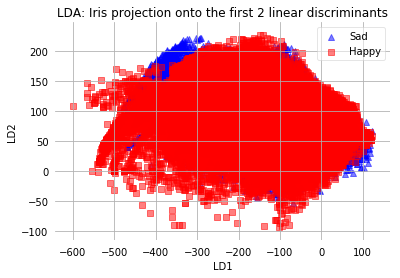

In [26]:
newX_dataDF = newDF.drop("label", axis=1)
newY_data = newDF["label"].values
# Convert dataframe to numpy
newX_data = newX_dataDF.as_matrix(columns=None)
plot_step_lda(newX_data, newY_data)